In [1]:
# autoreload
%load_ext autoreload
%autoreload 2
%matplotlib inline

import os
import sys

import pathmagic
from tools.project import proj_dir

Seeeeeeeeeeeeeding!!!
Dataset type: train

Data dirs ['../../../datasets/s7/train/seq0', '../../../datasets/s7/train/seq20', '../../../datasets/s7/train/seq39']
Using stats: ../../../datasets/s7/stats_total.json
Data Stats {'focus_min': 0.1, 'focus_max': 0.5, 'frames': {'depth': {'min': 0, 'max': 1.5}}}
MIN DEPTH HARDCODED!!!
depth_normalize: Normalize(0.03, 1.5, clamp_max=False)
coc_normalize: None
signed_coc_normalize: None
Lens: {'focal_length': 0.004200000000000001, 'depth_scale': 1, 'f_number': 1.7, 'aperture_radius': 0.002470588235294118}


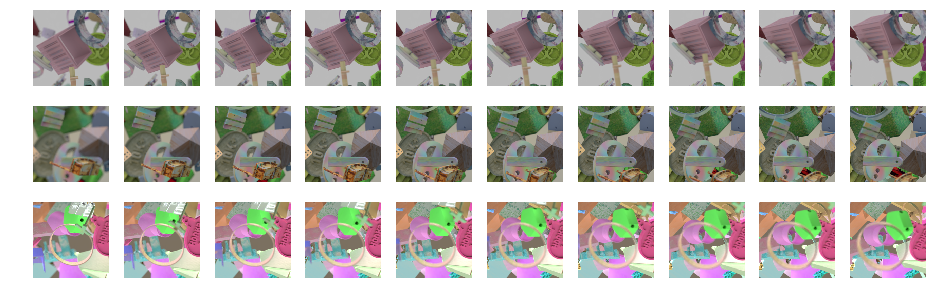

In [3]:
from tools.tools import deterministic
from tools.vis_tools import visualize_tensors, flow_to_vis
from data.video_depth_focus_data import VideoDepthFocusData
import matplotlib.pyplot as plt
from matplotlib import cm
import torch

deterministic()

data = VideoDepthFocusData(proj_dir("datasets"), "train", "s7")

data.configure(sample_count=10, sample_skip=1,
               use_allinfocus=False, single_depth_frame=None,
               include_fgbg=True, rand_reverse=False,
               color_noise_stddev=None, depth_noise_stddev=0.0)

data_indices = [0, 1, 2]

input_seq = torch.stack([data[idx]["color"] for idx in data_indices])

plt.figure(figsize=[16,5])
visualize_tensors(input_seq, column_order=False)

In [4]:
from tools.tools import IdentityModule
from net.sliding_window_net import SlidingWindowNet

net = IdentityModule(out_channels=1)
net2out = IdentityModule(out_channels=1, num_out=2)

slide_wnd_net1 = SlidingWindowNet(1, net, use_lazy_fwd=True)
slide_wnd_net2 = SlidingWindowNet(1, net2out, use_lazy_fwd=False)

out1 = slide_wnd_net1(input_seq)
out2 = slide_wnd_net2(input_seq)

print("\n", out1.shape, out2[0].shape)


 torch.Size([3, 10, 1, 224, 224]) torch.Size([3, 10, 1, 224, 224])


In [5]:
print(((out1 - out2[0][:, 3:7])**2).sum())

RuntimeError: The size of tensor a (10) must match the size of tensor b (4) at non-singleton dimension 1

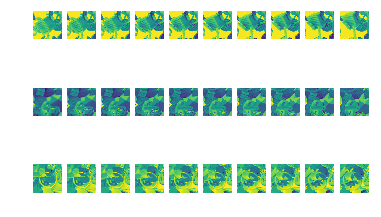

In [22]:
visualize_tensors(out2, column_order=False)

In [1]:
print("sdasa"

SyntaxError: unexpected EOF while parsing (<ipython-input-1-2a92f7f1abd0>, line 1)